# Piece together a Directional Spectrum from Obs Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.waveTools import readDatawell, waveStats
from src.waveTools.readDatawell import datawellFreqBins1d
import xarray as xr

Gather all our data from the different files.

In [13]:
filepath_1d = "./example_data/brisbane_4183{0xF20}2020-02.csv"
filepath_prim = './example_data/brisbane_4183{0xF21}2020-02.csv'
filepath_sec = './example_data/brisbane_4183{0xF28}2020-02.csv'

spectrum1D = readDatawell.readSpectrum1D_f20(filepath_1d)
primDirSpec = readDatawell.readPrimDirSpectrum(filepath_prim)
secDirSpec = readDatawell.readSecDirSpectrum(filepath_sec)
# this is for comparison, but is also used to scale the directional spectrum
stats = readDatawell.readSpecWaveParams('./example_data/brisbane_4183{0xF25}2020-02.csv')

directional_spectrum = readDatawell.calculateDirectionalSpectrum(spectrum1D, primDirSpec, secDirSpec, stats, direction_step=5)

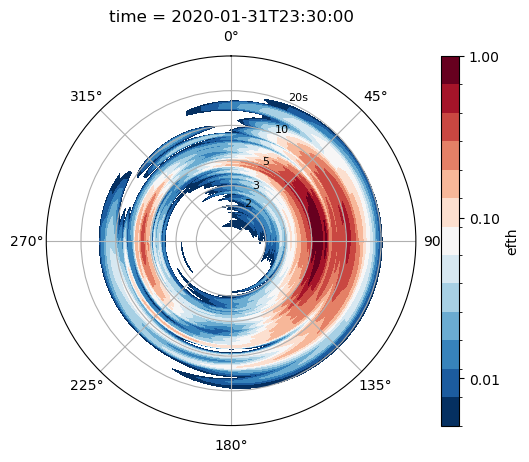

In [14]:
directional_spectrum.isel(time = 0).spec.plot(as_period = True)

What about the 1D spectrum?

In [35]:
oned = directional_spectrum.isel(time = 0).spec.oned()

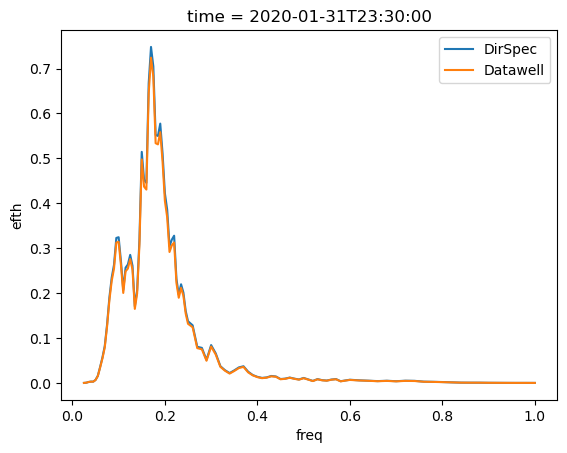

In [36]:
oned.plot(label = 'DirSpec')
spectrum1D.iloc[0][3:].plot(label = 'Datawell')
plt.legend()

In [37]:
#add dp in degrees to stats
stats['dp'] = np.rad2deg(stats['dirP(rad)'])

Plot our data

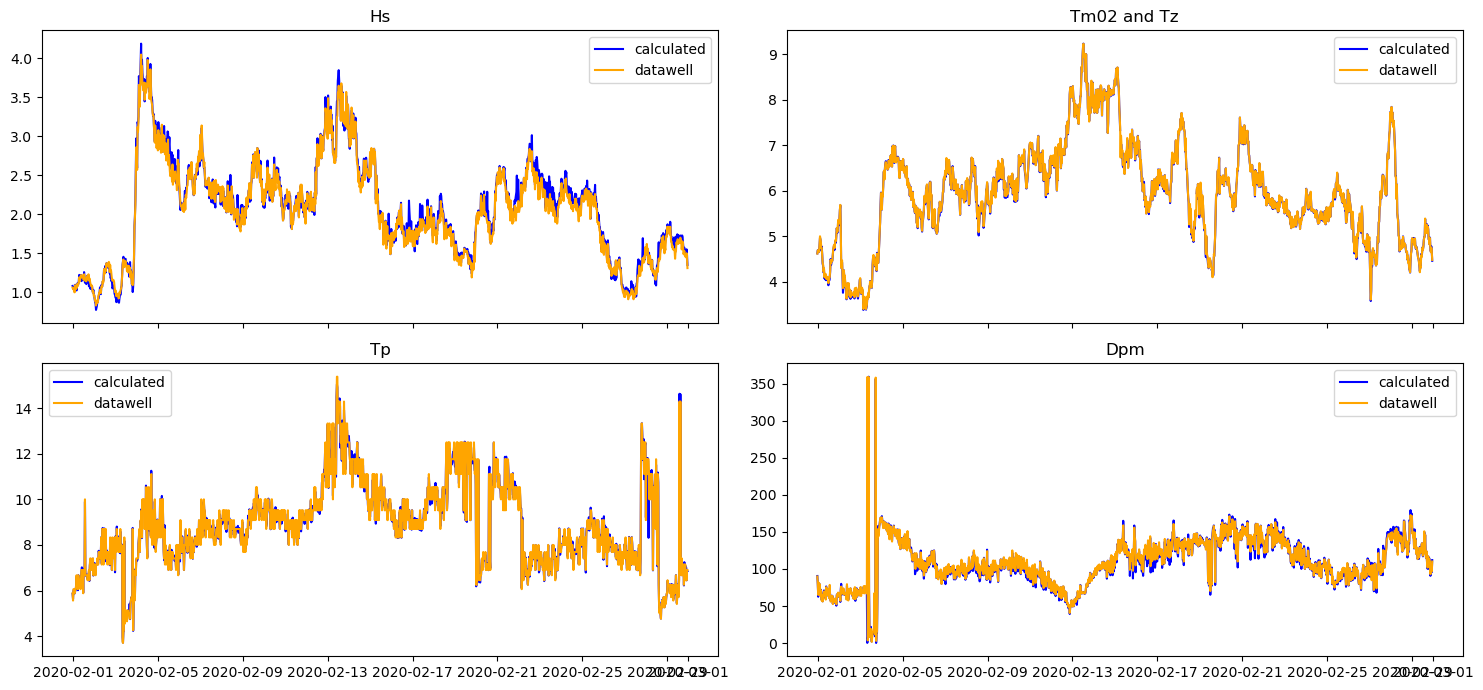

In [34]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 7), sharex=True)

# Define colors
calculated_color = 'blue'
datawell_color = 'orange'

# Plot directional spectrum and statistics in the first row of subplots
axs[0, 0].plot(directional_spectrum.time, directional_spectrum.spec.hs(), label='calculated', color=calculated_color)
axs[0, 0].plot(stats.Hs, label='datawell', color=datawell_color)
axs[0, 0].legend()
axs[0, 0].set_title('Hs')

axs[0, 1].plot(directional_spectrum.time, directional_spectrum.spec.tm02(), label='calculated', color=calculated_color)
axs[0, 1].plot(stats.Tz, label='datawell', color=datawell_color)
axs[0, 1].legend()
axs[0, 1].set_title('Tm02 and Tz')

# Plot Tp in the second row of subplots
axs[1, 0].plot(directional_spectrum.time, directional_spectrum.spec.tp(), label='calculated', color=calculated_color)
axs[1, 0].plot(stats.Tp, label='datawell', color=datawell_color)
axs[1, 0].legend()
axs[1, 0].set_title('Tp')

# Plot directional spectrum and statistics in the second row of subplots
axs[1, 1].plot(directional_spectrum.time, directional_spectrum.spec.dpm(), label='calculated', color=calculated_color)
axs[1, 1].plot(stats.dp, label='datawell', color=datawell_color)
axs[1, 1].legend()
axs[1, 1].set_title('Dpm')

plt.tight_layout()
plt.show()